#### decaying E-greedy + add random noise

Success rate: 0.9725
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


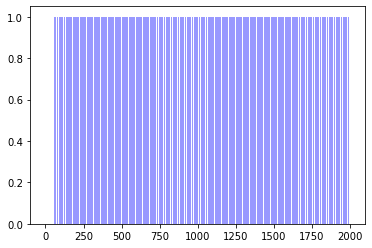

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

# register(
#     id='FrozenLake-v3',
#     entry_point='gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name' : '4x4', 'is_slippery': False}
# )
# env = gym.make('FrozenLake-v3')

# Q를 모두 0으로 초기화.  Q[16,4]
Q = np.zeros([env.observation_space.n, env.action_space.n]) 

#  learning parameters
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes): # 여러번 반복 학습
    state = env.reset()   # 환경 reset 후, 첫번째 상태 얻음 
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done: 
        #현재 state의 Q중 최대 reward를 얻을 수 있는 action을 구함. 
        #단, 알려진 길로만 가지 않기 위해서 random 값 add. 
        # 학습 후반 부로 갈 수로 random 값의 영향을 적게 하기위해   random/(i+1)
        #1행 4열의 난수를 만들음 => 학습횟수로나눔 + Q테이블이 갖고있는값을 더 함
        action = np.argmax(Q[state,:]  + np.random.randn(1, env.action_space.n) / (i+1))

         # 환경에서 action 후, new_state와 reward를 얻음 
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using decay rate
        Q[state, action] = reward +  np.max(Q[new_state, :])

        rAll += reward
        state = new_state
    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()



#### Q가 어느길이 더빠른길인지는 아직까지 알수없다는 단점이 있음